In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/Users/mamadouourydiallo/Downloads/gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [4]:
df.shape

(55, 2)

In [6]:
x = df.drop("Value", axis=1)
y = df['Value']

In [7]:
# Transform 'x' into an Array
x1 = pd.DataFrame.to_numpy(x)
print(x1)

[[1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]]


Text(0.5, 1.0, 'Non-Linear Data')

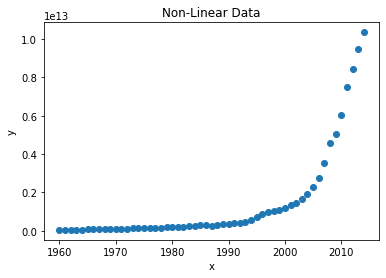

In [8]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Non-Linear Data')

In [9]:
# Polynomial Degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x1)

print(x1[3])
# second value = to check spread of values
print(x_poly[3])

[1963]
[1.963000e+03 3.853369e+06]


In [10]:
model = LinearRegression()
model.fit(x_poly, y)

print('Coefficients of x: ', model.coef_)
# there's 2 coefficients bcos its a quadratic
print('Intercept of x: ', model.intercept_)

# Prediction
y_deg2 = model.predict(x_poly)

Coefficients of x:  [-2.45476773e+13  6.20549496e+09]
Intercept of x:  2.4275765309680172e+16


In [11]:
# Model Evaluation
print('MSE of Polyregression Model: %.2f' % mean_squared_error(y, y_deg2))
print('R2 Score of Non-Linear Model:', model.score(x_poly, y))

MSE of Polyregression Model: 966880254043974484885504.00
R2 Score of Non-Linear Model: 0.8424446722331709


Text(0.5, 1.0, 'Quadratic Prediction Plot')

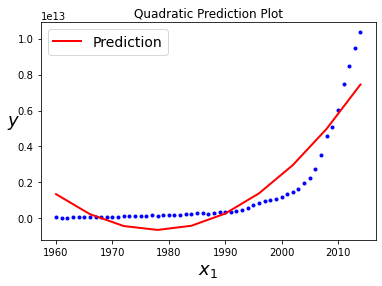

In [12]:
x_new = np.linspace(1960, 2014, 10).reshape(10, 1)
x_new_poly = poly_features.transform(x_new)
y_new = model.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Prediction")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Quadratic Prediction Plot")

In [19]:
parameters = {'loss':('huber', 'epsilon_insensitive'),
              'penalty':('l2', 'l1', 'elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1],
              'max_iter':[1000,5000,10000,20000]}

model3 = SGDRegressor(random_state=0)

clf = GridSearchCV(model3, parameters)

clf.fit(x_poly, y)

GridSearchCV(estimator=SGDRegressor(random_state=0),
             param_grid={'alpha':[1e-6,1e-5,0.0001,0.001,0.01,0.1,1],
                         'loss':('huber', 'epsilon_insensitive'),
                         'max_iter':[1000,5000,10000,20000],
                         'penalty':('l2', 'l1', 'elasticnet'),})

GridSearchCV(estimator=SGDRegressor(random_state=0),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('huber', 'epsilon_insensitive'),
                         'max_iter': [1000, 5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [20]:
# SGD Analysis
model = SGDRegressor(random_state=5)
model.fit(x_poly, y)

SGDRegressor(random_state=5)

In [21]:
R2 = model.score(x_poly, y)
print("R-squared: %.2f" % R2)

R-squared: -25005341895724109824.00


In [22]:
MSE = mean_squared_error(y, y_deg2)
print("Mean squared error: %.2f" % MSE)

Mean squared error: 966880254043974484885504.00


In [23]:
print("Coefficients:", model.coef_)
print("Y_intercept", model.intercept_, "\n")

Coefficients: [-8.27571455e+11  3.13694841e+15]
Y_intercept [-1.62912129e+09] 



In [25]:
print(model.get_params())

{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 5, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [27]:
parameters = {'loss':('huber', 'epsilon_insensitive'),
              'penalty':('l2', 'l1', 'elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1],
              'max_iter':[1000,5000,10000,20000]}

model3 = SGDRegressor(random_state=0)

clf = GridSearchCV(model3, parameters)

clf.fit(x_poly, y)

GridSearchCV(estimator=SGDRegressor(random_state=0),
             param_grid={'alpha':[1e-6,1e-5,0.0001,0.001,0.01,0.1,1],
                         'loss':('huber', 'epsilon_insensitive'),
                         'max_iter':[1000,5000,10000,20000],
                         'penalty':('l2', 'l1', 'elasticnet'),})

GridSearchCV(estimator=SGDRegressor(random_state=0),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('huber', 'epsilon_insensitive'),
                         'max_iter': [1000, 5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [28]:
print(clf.best_params_)

{'alpha': 1, 'loss': 'huber', 'max_iter': 1000, 'penalty': 'l2'}


In [29]:
print(clf.best_score_)

-76.59416767506205
